In [53]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [57]:
#process the data
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

dimData = np.prod(train_images.shape[1:])

train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

In [58]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#scaling the data
train_data /=255.0
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 6s 24ms/step - loss: 0.4980 - accuracy: 0.8420 - val_loss: 0.1542 - val_accuracy: 0.9488
Epoch 2/20
235/235 [==============================] - 6s 24ms/step - loss: 0.1065 - accuracy: 0.9674 - val_loss: 0.1281 - val_accuracy: 0.9609
Epoch 3/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0600 - accuracy: 0.9806 - val_loss: 0.0810 - val_accuracy: 0.9746
Epoch 4/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.0679 - val_accuracy: 0.9793
Epoch 5/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0699 - val_accuracy: 0.9811
Epoch 6/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0766 - val_accuracy: 0.9788
Epoch 7/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0705 - val_accuracy: 0.9833

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


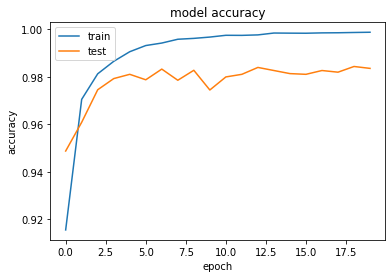

In [59]:
# Accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

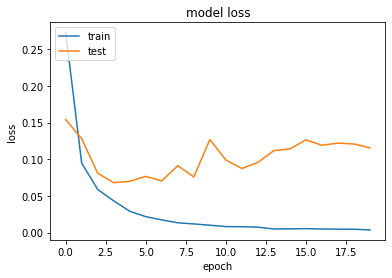

In [60]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.1156 - accuracy: 0.9836
Evaluation result on Test Data : Loss = 0.11555932462215424, accuracy = 0.9836000204086304


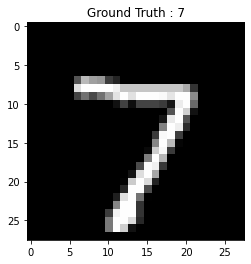

In [61]:
# Question 2. Plotting the image of the test data

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

plt.imshow(test_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[0]))
plt.show()